## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x - ((x.max() - x.min())/2)) / ((x.max() - x.min())/2)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[4096, 2048, 1024, 512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 4096)              12587008  
_________________________________________________________________
hidden_layer2 (Dense)        (None, 2048)              8390656   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
hidden_layer4 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               3289

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 158s 3ms/step - loss: 1.8387 - accuracy: 0.3336 - val_loss: 1.6471 - val_accuracy: 0.4042
Epoch 2/100
50000/50000 [==============================] - 160s 3ms/step - loss: 1.5591 - accuracy: 0.4495 - val_loss: 1.4780 - val_accuracy: 0.4817
Epoch 3/100
50000/50000 [==============================] - 152s 3ms/step - loss: 1.4218 - accuracy: 0.5016 - val_loss: 1.4241 - val_accuracy: 0.5011
Epoch 4/100
50000/50000 [==============================] - 160s 3ms/step - loss: 1.3161 - accuracy: 0.5411 - val_loss: 1.3703 - val_accuracy: 0.5259
Epoch 5/100
50000/50000 [==============================] - 149s 3ms/step - loss: 1.2188 - accuracy: 0.5735 - val_loss: 1.3845 - val_accuracy: 0.5157
Epoch 6/100
50000/50000 [==============================] - 147s 3ms/step - loss: 1.1310 - accuracy: 0.6003 - val_loss: 1.3636 - val_accuracy: 0.5385
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 146s 3ms/step - loss: 0.0756 - accuracy: 0.9782 - val_loss: 3.2008 - val_accuracy: 0.5466
Epoch 56/100
50000/50000 [==============================] - 145s 3ms/step - loss: 0.0739 - accuracy: 0.9775 - val_loss: 3.1473 - val_accuracy: 0.5533
Epoch 57/100
50000/50000 [==============================] - 155s 3ms/step - loss: 0.0732 - accuracy: 0.9774 - val_loss: 3.1654 - val_accuracy: 0.5544
Epoch 58/100
50000/50000 [==============================] - 165s 3ms/step - loss: 0.0632 - accuracy: 0.9811 - val_loss: 3.1391 - val_accuracy: 0.5527
Epoch 59/100
50000/50000 [==============================] - 159s 3ms/step - loss: 0.0635 - accuracy: 0.9817 - val_loss: 3.3396 - val_accuracy: 0.5546
Epoch 60/100
50000/50000 [==============================] - 149s 3ms/step - loss: 0.0565 - accuracy: 0.9835 - val_loss: 3.5378 - val_accuracy: 0.5512
Epoch 61/100
50000/50000 [==============================] - 139s 3ms/step - loss: 0.0764 - accuracy: 0.9787 - val

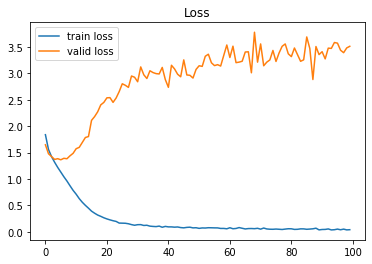

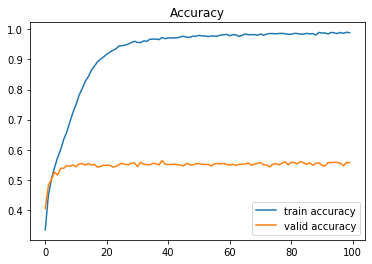

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()